# Car Pricing Predictions

## Loading basic libraries

In [1]:
import numpy as np
import pandas as pd
import source.config as config
import source.load_push_data as lp
import source.data_analytics as da
from source.preprocessing_functions import Car_Names, Change_Data_Type, Currency_Corrector, Years_Passed
from source.preprocessing_functions import Unit_Corrector, Remove_Substring, Duplicated_Data, Skew_Kurt
from source.preprocessing_functions import One_Hot_Encoding_Train, One_Hot_Encoding_Tests 
from source.preprocessing_functions import Standard_Scaling_Train, Standard_Scaling_Tests, Reduce_Memory_Usage
from source.machine_learning_toolbox import Random_Forest_Regresor, CatBoost_Regresor
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

np.random.seed(seed=config.SEED)

## Loading the data

In [2]:
data = lp.load_data(config.DATA)
data.head(10)

,Name,Year,Selling_Price,Kms_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Torque,Seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
data.shape

(8128, 13)

I see there are 8128 data points and 12 columns!

## Data types

In [4]:
data.Name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [5]:
data.Year.unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991])

In [6]:
data.Fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [7]:
data.Seller_Type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [8]:
data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
data.Owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [10]:
data.Mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [11]:
data.Engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [12]:
data.Max_Power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [13]:
data.Torque.unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [14]:
data.Seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [15]:
types = data.dtypes.to_frame()
types = types.rename(columns={0: "Type"})
types

,Type
Name,object
Year,int64
Selling_Price,int64
Kms_Driven,int64
Fuel,object
Seller_Type,object
Transmission,object
Owner,object
Mileage,object
Engine,object


I will delete the predictor Torque as they look messy and intuitively, won't make any improvement in the prediction phase!

I will discard as well all missing data!

In [16]:
data.drop('Torque',axis=1,inplace=True)
data.dropna(inplace=True)

I will create a new predictor out of the car names called Brand!

I will transform the variables Selling_Price and Kms_Driven to float, while Seats to string!

In [17]:
brand_branch = Car_Names('Name')
data = brand_branch.fit_transform(data)
to_integer = Change_Data_Type('Seats','Integer')
data = to_integer.fit_transform(data)
to_string = Change_Data_Type('Seats','String')
data = to_string.fit_transform(data)
to_float = Change_Data_Type('Selling_Price','Float')
data = to_float.fit_transform(data)
to_float = Change_Data_Type('Kms_Driven','Float')
data = to_float.fit_transform(data)

Since cars suffer depreciation over the years, I will transform the variable Year, which corresponds to the year the car was built, to the actual number of years passed till the present, let's say 2022!

In [18]:
years_passed = Years_Passed('Year',config.YEAR)
data = years_passed.fit_transform(data)

In [19]:
data.head(10)

,Year,Selling_Price,Kms_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats,Brand
0,8.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Maruti
1,8.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Skoda
2,16.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Honda
3,12.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Hyundai
4,15.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Maruti
5,5.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5,Hyundai
6,15.0,96000.0,175000.0,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5,Maruti
7,21.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4,Maruti
8,11.0,350000.0,90000.0,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5,Toyota
9,9.0,200000.0,169000.0,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5,Ford


I wee as well that in the column Mileage there are two different units: km/kg and kmpl!

I will count how many of these units are present and convert one of them, in order to have only one!

In [20]:
kmpl, kmkg = 0, 0
for el in data.Mileage:
    if str(el).endswith("km/kg"):
        kmkg+=1
    elif str(el).endswith("kmpl"):
        kmpl+=1
print('The number of rows with km/kg : {} '.format(kmkg))
print('The number of rows with kmpl : {} '.format(kmpl))

The number of rows with km/kg : 88 
The number of rows with kmpl : 7819 


Since the number of rows with km/kg is smaller than with kmpl, the most reasonable is to transform km/kg to kmpl and rename the column to Mileage[kmpl]!

In [21]:
corrector = Unit_Corrector('Mileage',1.40)
data = corrector.fit_transform(data)
data = data.rename(columns={"Mileage": "Mileage[kmpl]"})

The selling price is in Indian Rupees, I will concert it to Euros at the currency rate of conversion 0.011!

In [22]:
rupee_euros = Currency_Corrector(config.TARGET,config.CONVERSION_RATE)
data = rupee_euros.fit_transform(data)

In [23]:
remove_substring = Remove_Substring('Engine',' CC')
data = remove_substring.fit_transform(data)
to_float = Change_Data_Type('Engine','Float')
data = to_float.fit_transform(data)
remove_substring = Remove_Substring('Max_Power',' bhp')
data = remove_substring.fit_transform(data)
data['Max_Power'] = pd.to_numeric(data['Max_Power'])
data = to_float.fit_transform(data)

In [24]:
data.head(10)

,Year,Selling_Price,Kms_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage[kmpl],Engine,Max_Power,Seats,Brand
0,8.0,4950.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti
1,8.0,4070.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda
2,16.0,1738.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda
3,12.0,2475.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai
4,15.0,1430.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti
5,5.0,4840.0,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5,Hyundai
6,15.0,1056.0,175000.0,LPG,Individual,Manual,First Owner,24.22,1061.0,57.50,5,Maruti
7,21.0,495.0,5000.0,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4,Maruti
8,11.0,3850.0,90000.0,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5,Toyota
9,9.0,2200.0,169000.0,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5,Ford


In [25]:
types = data.dtypes.to_frame()
types = types.rename(columns={0: "Type"})
types

,Type
Year,float64
Selling_Price,float64
Kms_Driven,float64
Fuel,object
Seller_Type,object
Transmission,object
Owner,object
Mileage[kmpl],float64
Engine,float64
Max_Power,float64


In [26]:
data.shape

(7907, 12)

After dropping the data points with missing values, the size of the data went from 8128 to 7907!

## Duplicated data

In [27]:
duplicates = Duplicated_Data()
data = duplicates.fit_transform(data)
data.shape

(6699, 12)

I see the number of entries reduced from 7907 to 6699, therefore, there were duplicated ones, that were removed!

## Data Analytics

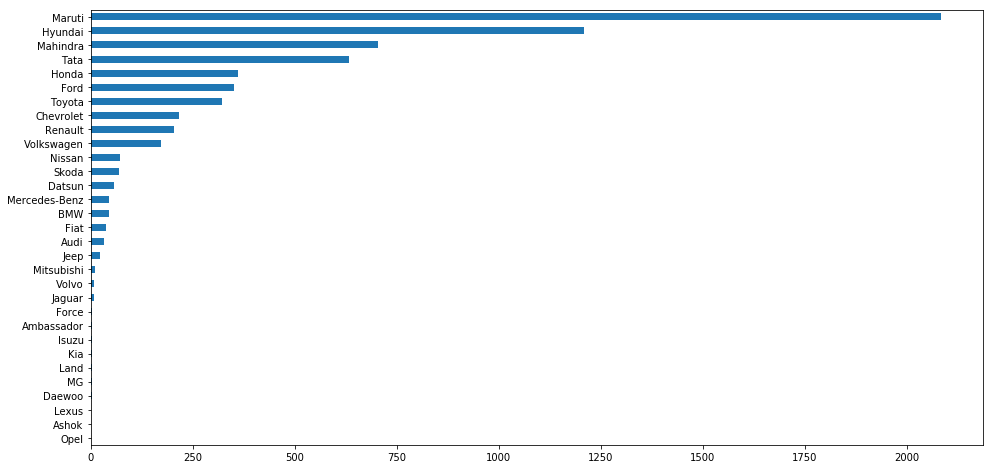

In [28]:
plt.rcParams['figure.figsize'] = (16.0, 8.0) # To set figure sizes for big plots
data['Brand'].value_counts(ascending=True).plot.barh()
plt.show()

In [29]:
data['Brand'].value_counts()

Maruti           2083
Hyundai          1210
Mahindra          705
Tata              632
Honda             361
Ford              352
Toyota            323
Chevrolet         216
Renault           205
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Force               4
Ambassador          4
Isuzu               4
Kia                 3
Land                3
MG                  3
Daewoo              3
Lexus               1
Ashok               1
Opel                1
Name: Brand, dtype: int64

The top five most sold cars are the Maruti, Hyundai, Mahindra, Tata and Honda!

The top five less sold cars are Ashok, Opel, Lexus, Land and MG!

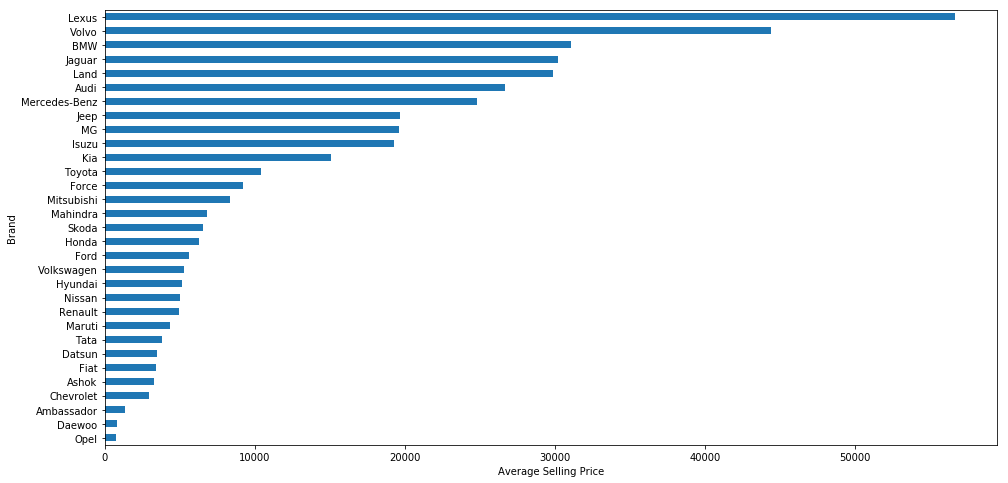

In [30]:
plt.rcParams['figure.figsize'] = (16.0, 8.0) # To set figure sizes for big plots
da.Plot_Group_By(data,'Brand',config.TARGET)

The top five more expensive (on average) cars are: Lexus, Volvo, BMW, Jaguar and Land!

The top five less expensive (on average) cars are: Opel, Daewoo, Ambassador, Chevrolet and Ashok!

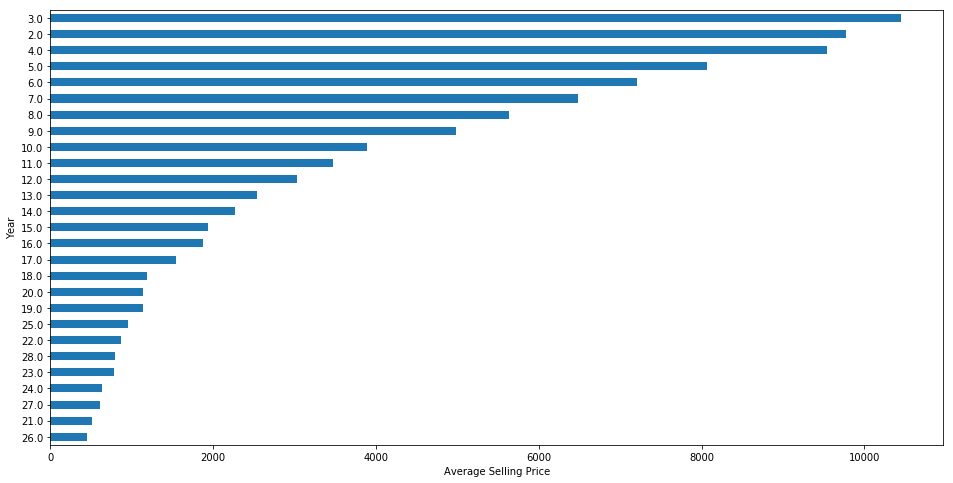

In [31]:
plt.rcParams['figure.figsize'] = (16.0, 8.0) # To set figure sizes for big plots
da.Plot_Group_By(data,'Year',config.TARGET)

The average Selling Price by Years passed from the construction till nowadays!

Newer cars are sold more expensive!

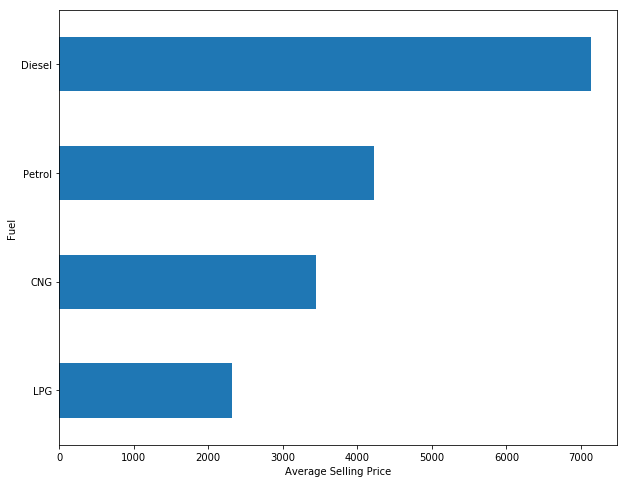

In [32]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # To set figure sizes for big plots
da.Plot_Group_By(data,'Fuel',config.TARGET)

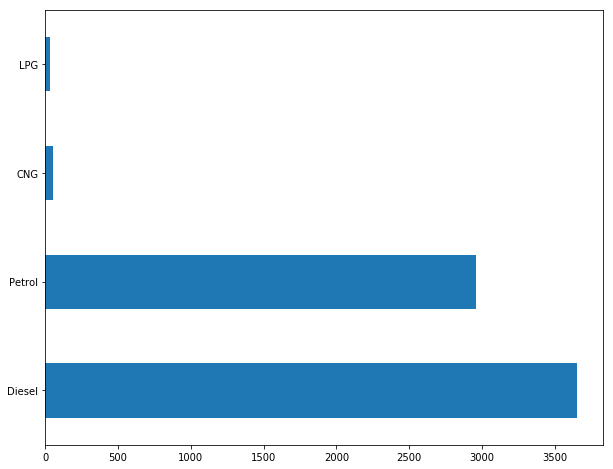

In [33]:
data['Fuel'].value_counts().plot(kind='barh')
plt.show()

In [34]:
data['Fuel'].value_counts()

Diesel    3650
Petrol    2962
CNG         52
LPG         35
Name: Fuel, dtype: int64

Above is shown the average Selling Price by Fuel Type cars!

Cars using Diesel are more expensive than Petrol, CNG or LPG!

There are 52 and 35 data points with CGN and LPG Fuel types, which are not representative and therefore, won't make any contribution to any predictive modeling!

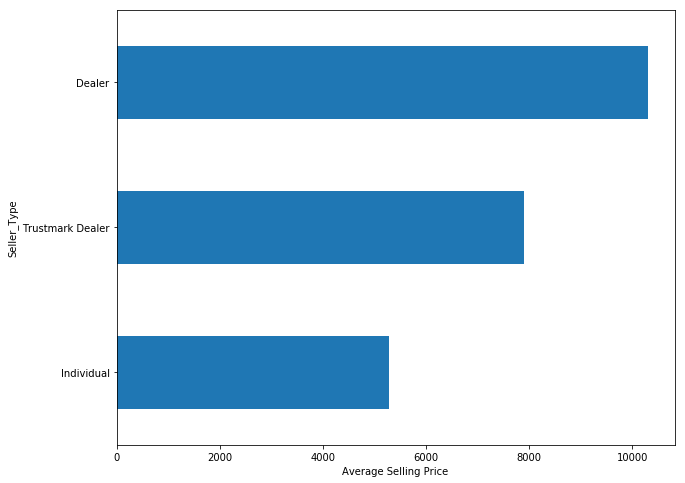

In [35]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # To set figure sizes for big plots
da.Plot_Group_By(data,'Seller_Type',config.TARGET)

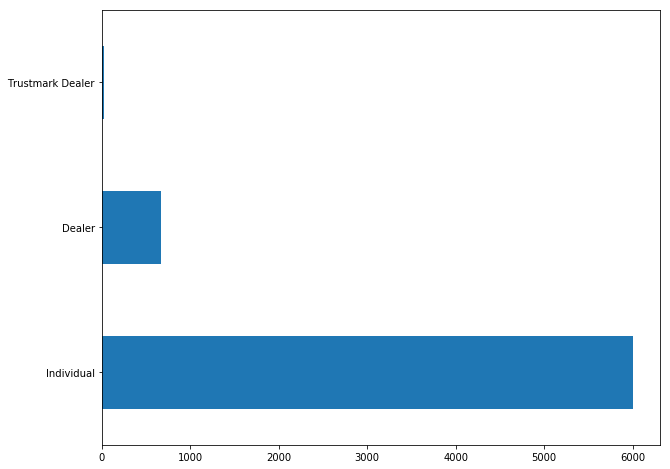

In [36]:
data['Seller_Type'].value_counts().plot(kind='barh')
plt.show()

In [37]:
data['Seller_Type'].value_counts()

Individual          6006
Dealer               666
Trustmark Dealer      27
Name: Seller_Type, dtype: int64

Above is shown the average Sellin Price of cars by Seller Types!

Cars sold by Dealers are on average more expensive than those sold by Trustmark Dealers and Individuals!

There are only 27 data points with Trustmark Dealers which are not representative and therefore, won't make any contribution to any predictive modeling!

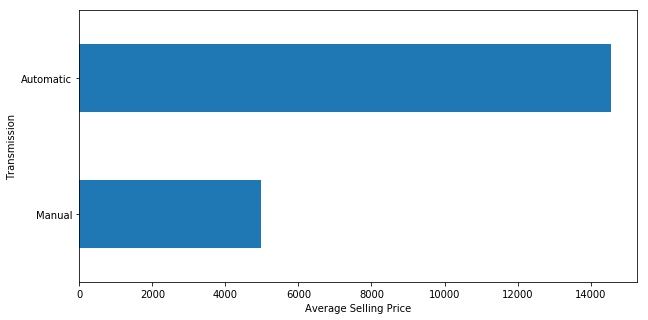

In [38]:
plt.rcParams['figure.figsize'] = (10.0, 5.0) # To set figure sizes for big plots
da.Plot_Group_By(data,'Transmission',config.TARGET)

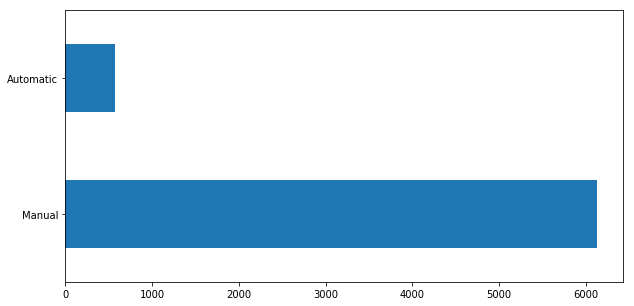

In [39]:
data['Transmission'].value_counts().plot(kind='barh')
plt.show()

Above is shown the average Selling Price by type of Transmission!

Automatic cars are on average sold more expensive than Manual ones, but Manual cars are most sold!

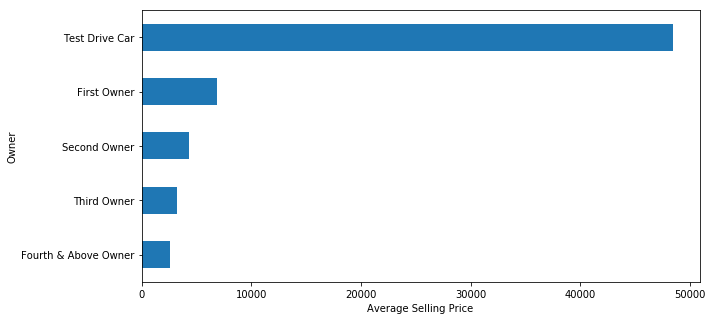

In [40]:
plt.rcParams['figure.figsize'] = (10.0, 5.0) # To set figure sizes for big plots
da.Plot_Group_By(data,'Owner',config.TARGET)

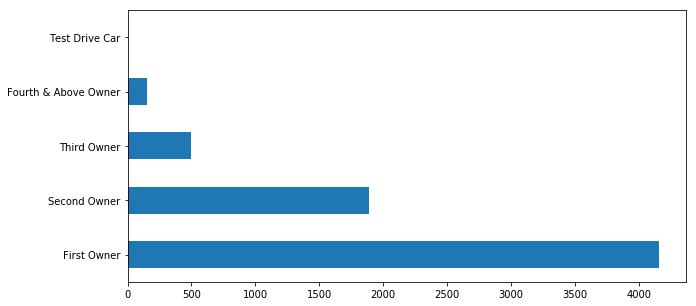

In [41]:
data['Owner'].value_counts().plot(kind='barh')
plt.show()

In [42]:
data['Owner'].value_counts()

First Owner             4160
Second Owner            1886
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: Owner, dtype: int64

Above is shown the average Selling Price by Owner!

Test Drive Cars are on average the most expensives!

There are only five data points with Test Drive Car, which is not representative at all and therefore, won't make any contribution to any predictive modeling!

## Train-Test Split

In [43]:
#from sklearn.model_selection import train_test_split
#training, testings = train_test_split(data,test_size=0.3,random_state=config.SEED)

#training.to_json(config.TRAINING,indent=4, orient='records')
#testings.to_json(config.TESTINGS,indent=4, orient='records')

I am splitting the data into Training and Testings subsamples, this way we can produce a generalized model to predict car prices!

I am saving those subsamples separately for model reproducibility purposes!

UN COMMENT THE LINES ABOVE IF NEEDED ANOTHER MACHINE LEARNING MODEL!

In [44]:
training, testings = lp.load_data(config.TRAINING), lp.load_data(config.TESTINGS)

I am loading back the training and testings subsamples for model production!

## Missing values

In [45]:
training.isnull().sum()

Year             0
Selling_Price    0
Kms_Driven       0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Mileage[kmpl]    0
Engine           0
Max_Power        1
Seats            0
Brand            0
dtype: int64

In [46]:
training = training.dropna()

In [47]:
testings.isnull().sum()

Year             0
Selling_Price    0
Kms_Driven       0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Mileage[kmpl]    0
Engine           0
Max_Power        0
Seats            0
Brand            0
dtype: int64

I deleted all data points with missing values, so the preprocessing should be easy!

## Numerical variables

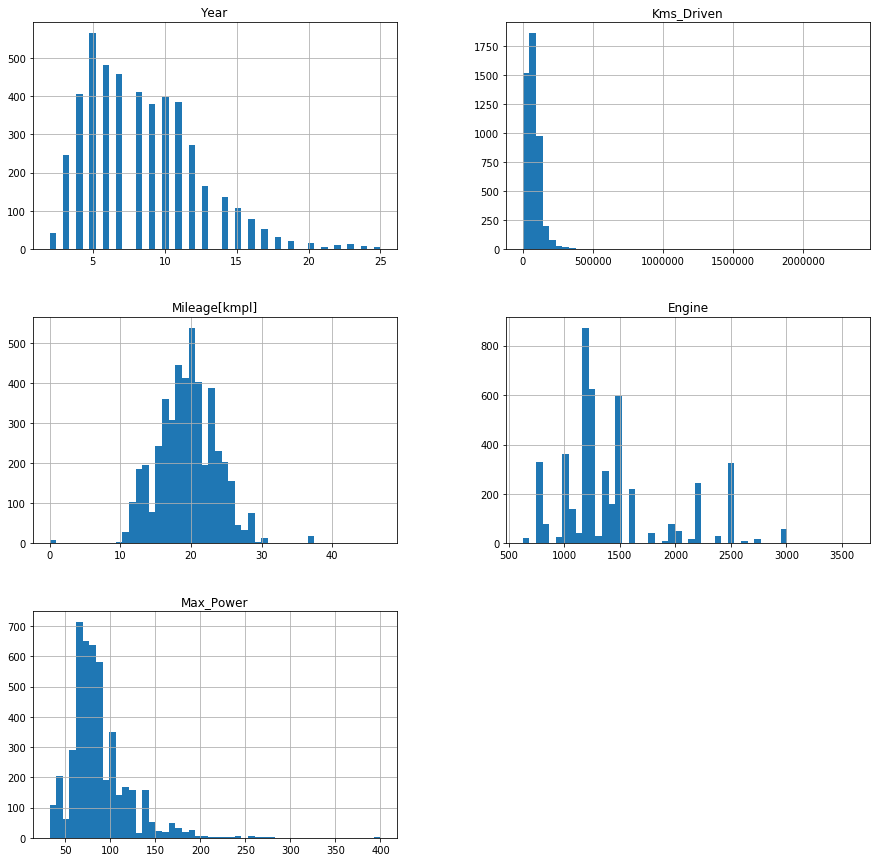

In [48]:
plt.rcParams['figure.figsize'] = (15.0,15.0)  
training[config.FLOAT_VARS].hist(bins=50)
plt.show()

In [49]:
skew_kurt = Skew_Kurt(config.FLOAT_VARS)
skew_kurt.fit(training)
skew_kurt.predict(training)

,Skewness,Kurtosis
Year,0.863667,0.872285
Kms_Driven,13.173407,471.840308
Mileage[kmpl],0.400452,2.438476
Engine,1.196845,0.888140
Max_Power,1.758333,5.965664


Some skewness is shown in the numerical variables, therefore, any linear model would be biased by these variables!

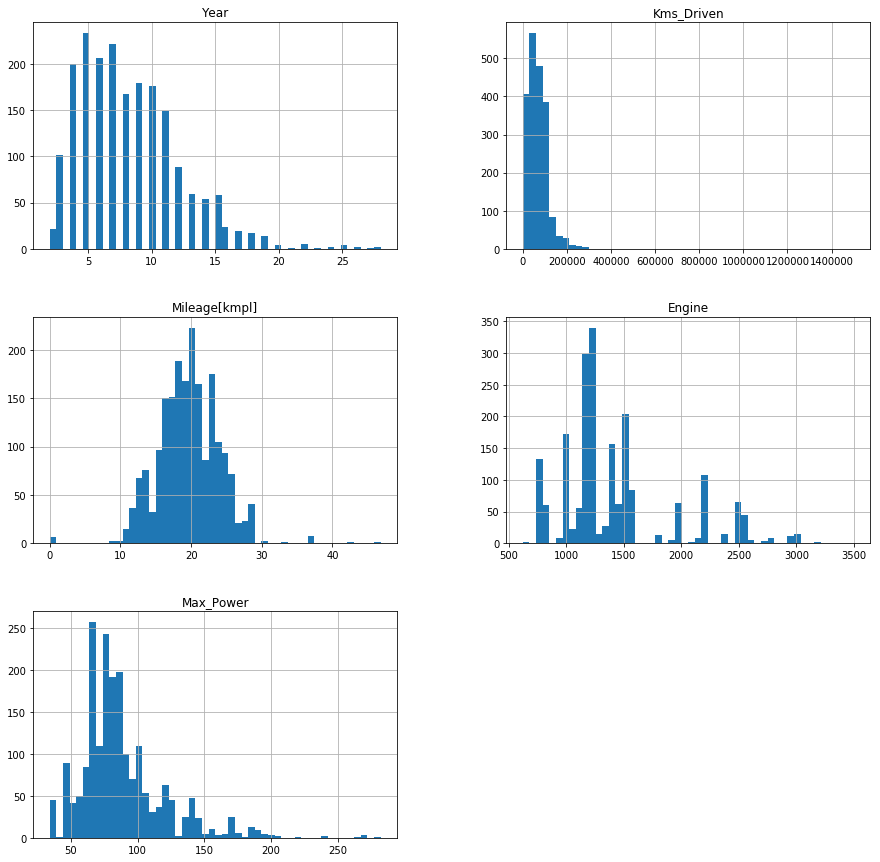

In [50]:
plt.rcParams['figure.figsize'] = (15.0,15.0)  
testings[config.FLOAT_VARS].hist(bins=50)
plt.show()

In [51]:
skew_kurt.fit(testings)
skew_kurt.predict(testings)

,Skewness,Kurtosis
Year,1.081709,1.826741
Kms_Driven,8.703210,196.483675
Mileage[kmpl],0.139421,2.490967
Engine,1.265630,1.190331
Max_Power,1.608028,4.209638


Similar in the testing subsample! 

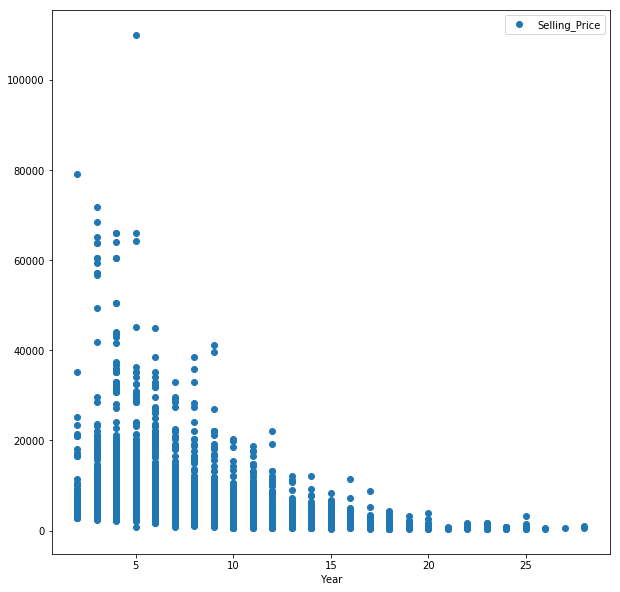

In [52]:
plt.rcParams['figure.figsize'] = (10.0,10.0)  
data.plot(x='Year', y=config.TARGET, style='o')
plt.show()

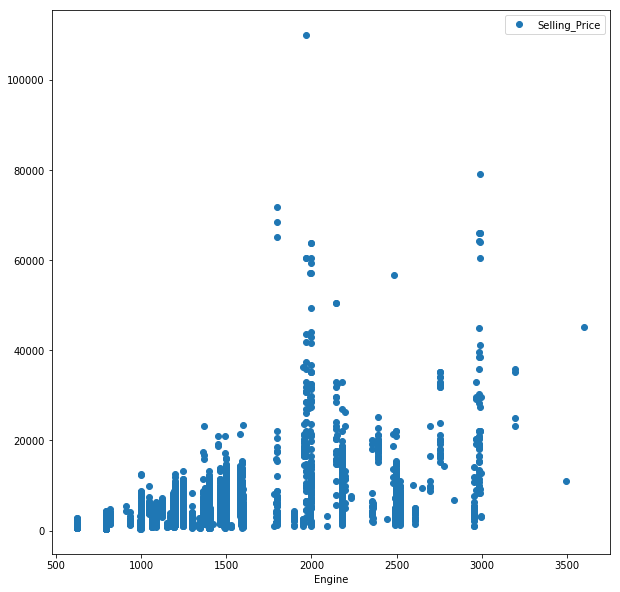

In [53]:
plt.rcParams['figure.figsize'] = (10.0,10.0)  
data.plot(x='Engine', y=config.TARGET, style='o')
plt.show()

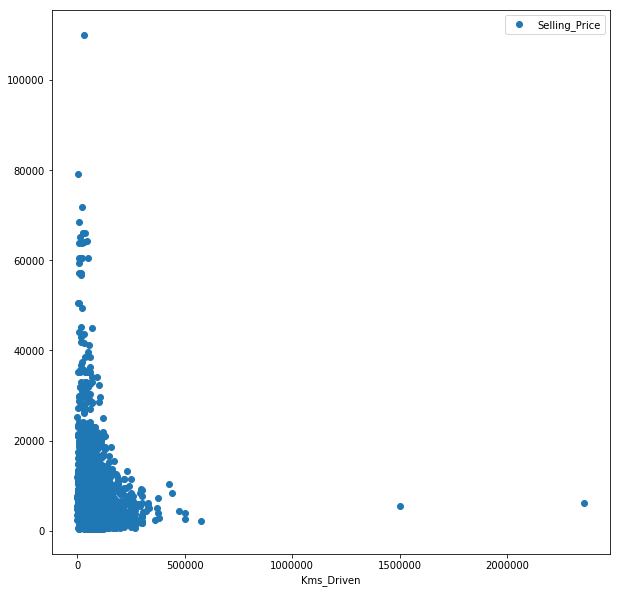

In [54]:
plt.rcParams['figure.figsize'] = (10.0,10.0)  
data.plot(x='Kms_Driven', y=config.TARGET, style='o')
plt.show()

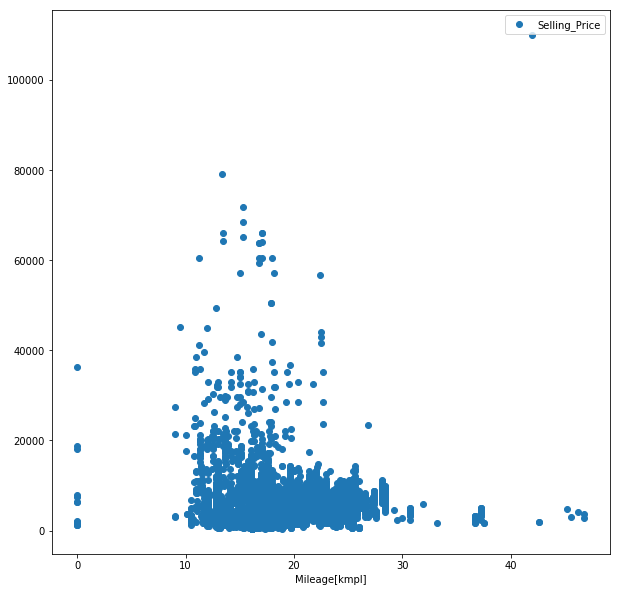

In [55]:
plt.rcParams['figure.figsize'] = (10.0,10.0)  
data.plot(x='Mileage[kmpl]', y=config.TARGET, style='o')
plt.show()

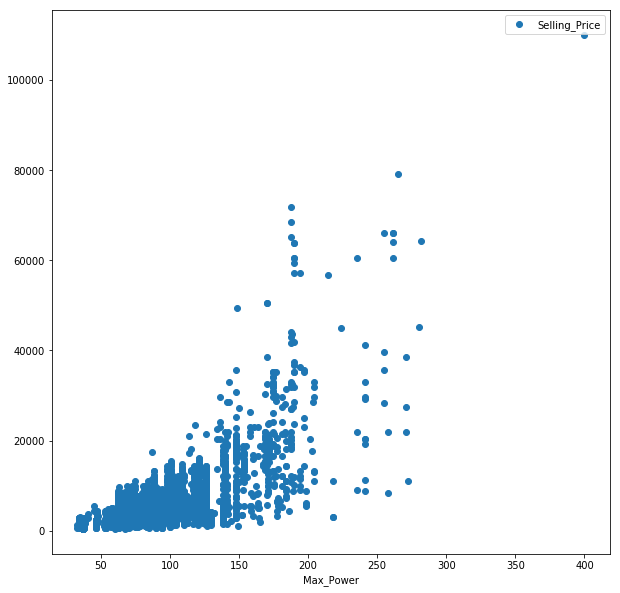

In [56]:
plt.rcParams['figure.figsize'] = (10.0,10.0)  
data.plot(x='Max_Power', y=config.TARGET, style='o')
plt.show()

I see that the variables such as Years, Max Power and Engine show a correlation to the target variable: Selling Price; however, Kms_Driven shows a lot of scatters and outliers, and it won't be a good predictor in case of a linear model; in addition, the relations observed seem non linear, so a linear model would be a total error!

I won't be using any linear model for these reasons!

## Categorical Encoding

In [57]:
one_hot_train = One_Hot_Encoding_Train(config.CAT_VARS)
training = one_hot_train.fit_transform(training)
one_hot_tests = One_Hot_Encoding_Tests(config.CAT_VARS,list(training.columns))
testings = one_hot_tests.fit_transform(testings)

In [58]:
training.head(10)

,Year,Selling_Price,Kms_Driven,Mileage[kmpl],Engine,Max_Power,Brand[Ambassador],Brand[Ashok],Brand[Audi],Brand[BMW],...,Owner[Third Owner],Seats[10],Seats[14],Seats[2],Seats[4],Seats[5],Seats[6],Seats[7],Seats[8],Seats[9]
0,7.0,4400.000,20000.0,20.51,998.0,67.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.0,7150.000,15000.0,22.00,1197.0,81.80,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,10.0,3520.000,107825.0,21.90,1396.0,90.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,10.0,2475.000,80000.0,18.90,998.0,67.10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.0,4235.000,50000.0,23.10,998.0,67.04,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3.0,13200.000,20000.0,22.00,1582.0,126.20,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,5.0,5609.989,20000.0,22.00,1197.0,81.80,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,7.0,4400.000,40000.0,18.90,1197.0,82.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,6.0,5940.000,20000.0,20.40,1197.0,81.80,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,11.0,2750.000,55130.0,20.00,1399.0,68.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


All categorical variables were encoded into dummy variables, first the train and then the test subsample. 

In the dummy conversion, I decided to keep the first variables, even if it is redundant, because I want to observe their predictive power directly!

## Standard Scaling

In [59]:
scale_train = Standard_Scaling_Train(config.FLOAT_VARS)
training = scale_train.fit_transform(training)
scale_tests = Standard_Scaling_Tests(config.FLOAT_VARS,scale_train)
testings = scale_tests.fit_transform(testings)

In [60]:
training.head(10)

,Year,Selling_Price,Kms_Driven,Mileage[kmpl],Engine,Max_Power,Brand[Ambassador],Brand[Ashok],Brand[Audi],Brand[BMW],...,Owner[Third Owner],Seats[10],Seats[14],Seats[2],Seats[4],Seats[5],Seats[6],Seats[7],Seats[8],Seats[9]
0,-0.368181,4400.000,-0.905358,0.229279,-0.883349,-0.656034,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.399263,7150.000,-0.989563,0.578987,-0.481275,-0.189117,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.405131,3520.000,0.573720,0.555516,-0.079200,0.069580,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.405131,2475.000,0.105114,-0.148594,-0.883349,-0.652879,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.141492,4235.000,-0.400122,0.837160,-0.883349,-0.654772,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,-1.399263,13200.000,-0.905358,0.578987,0.296609,1.211632,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,-0.883722,5609.989,-0.905358,0.578987,-0.481275,-0.189117,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,-0.368181,4400.000,-0.568534,-0.148594,-0.481275,-0.182808,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,-0.625951,5940.000,-0.905358,0.203461,-0.481275,-0.189117,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0.662901,2750.000,-0.313727,0.109580,-0.073138,-0.624485,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
training.shape

(4688, 59)

The numerical variables were relocated and scaled to have zero mean and unit standard deviation, this way the algorithms can handle better the data, not working with large numbers! 

## Reduce Memory Size

In [62]:
training.memory_usage().sum()/1024**2

0.4873199462890625

In [63]:
reduce_memory = Reduce_Memory_Usage()
training = reduce_memory.fit_transform(training)
training.memory_usage().sum()/1024**2

0.572265625

In [64]:
testings.memory_usage().sum()/1024**2

0.27423667907714844

In [65]:
testings = reduce_memory.fit_transform(testings)
testings.memory_usage().sum()/1024**2

0.21864700317382812

I transformed the data types of both subsamples, to reduce the memory space!

A noticeable improvement was achieved!

## Machine Learning Model

In [66]:
for el in training.columns:
    print(el)
    da.Normality_Check(training[el],0.01)
    print(' ')

Year
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Selling_Price
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Kms_Driven
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Mileage[kmpl]
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Engine
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Max_Power
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Brand[Ambassador]
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Brand[Ashok]
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Brand[Audi]
Normal Test: The null hypothesis can be rejected
Kolmogorov Test

Before choosing a specific algorithm for the predictive section, I ran two Hypothesis Tests to be sure that it not worthy to use a linear one. This is shown above where I checked if the predictor variables are normally distributed, by running a normality and Kolmogorov test. In all cases, the p-values are less than the threshold 0.01 thus rejecting the Null Hypothesis of the variable coming from a Normal Distribution. 

Without further ado, I am going to use a non-linear algorithm to make the predictions!

In [67]:
X, y = training.drop(config.TARGET,axis=1), training[config.TARGET]
y = np.log10(y)

#rf_model = Random_Forest_Regresor(config.RF_BOUNDS)
#rf_model = rf_model.fit(X,y)
#with open(config.RF_MODEL,'wb') as f:
#    joblib.dump(rf_model,f)

#cb_model = CatBoost_Regresor(config.CB_BOUNDS)
#cb_model = cb_model.fit(X,y)
#with open(config.CB_MODEL,'wb') as f:
#    joblib.dump(cb_model,f)

In the above cells I produced two regression models using the Random Forest and CatBoost Regression algorithms. I optimized the hyperparameters of the models that maximizes the $R^2-$score. 

In the next cell I am saving the model for the production environment!

UNCOMMENT THE LINES ABOVE IF NEEDED ANOTHER MODEL!

In [68]:
with open(config.RF_MODEL,'rb') as f:
    rf_model = joblib.load(f)

with open(config.CB_MODEL,'rb') as f:
    cb_model = joblib.load(f)

In the above line, I load the produced model from the directory I have stored it!

## Scoring the models

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

X_train, y_train = training.drop(config.TARGET,axis=1), training[config.TARGET]

y_preds_train_rf = rf_model.predict(X_train)
y_preds_train_rf = 10.0**y_preds_train_rf
rsqd_rf = round(r2_score(y_train, y_preds_train_rf),3)
print('The R²-score of the Random Forest Regressor model is {} on the training subsample.'.format(rsqd_rf))
rmse_rf = round(np.sqrt(mean_squared_error(y_train, y_preds_train_rf)),3)
print('The RMSE of the Random Forest Regressor model is {} on the training subsample.'.format(rmse_rf))

print(" ")

y_preds_train_cb = cb_model.predict(X_train)
y_preds_train_cb = 10.0**y_preds_train_cb
rsqd_cb = round(r2_score(y_train, y_preds_train_cb),3)
print('The R²-score of the CatBoost Regressor model is {} on the training subsample.'.format(rsqd_cb))
rmse_cb = round(np.sqrt(mean_squared_error(y_train, y_preds_train_cb)),3)
print('The RMSE of the CatBoost Regressor model is {} on the training subsample.'.format(rmse_cb))

The R²-score of the Random Forest Regressor model is 0.478 on the training subsample.
The RMSE of the Random Forest Regressor model is 4205.362 on the training subsample.
 
The R²-score of the CatBoost Regressor model is 0.948 on the training subsample.
The RMSE of the CatBoost Regressor model is 1330.686 on the training subsample.


The R² score of the CatBoost Regressor model is the highest on the training subsample; its RMSE is the lowest as well!

The Random Forest Regressor performs poorly!

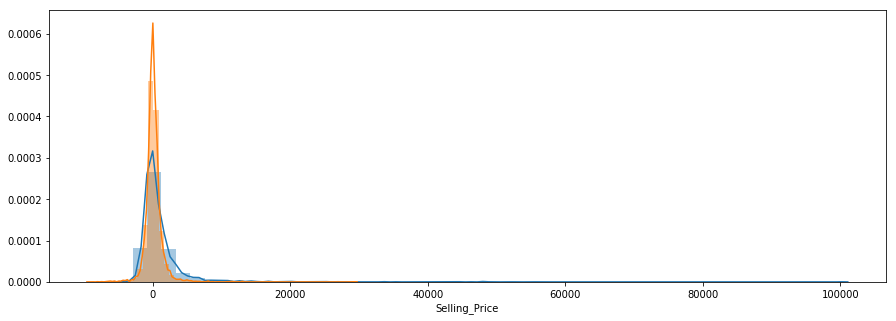

In [70]:
plt.rcParams['figure.figsize'] = (15.0,5.0)  
sns.distplot(y_train-y_preds_train_rf)
sns.distplot(y_train-y_preds_train_cb)
plt.show()

The distributions of the predition errors on the training subsample look similar to a Normal Distribution, which is good as well, but to be sure, I will run again a Normality Hypothesis Test!

In [71]:
from scipy.stats import skew, kurtosis

res_train_rf = y_train-y_preds_train_rf
res_train_cb = y_train-y_preds_train_cb

da.Normality_Check(res_train_rf,0.01)
print(' ')
da.Normality_Check(res_train_cb,0.01)

print(' ')
print('Random Forest Regressor')
print('Skewness of the residuals (for a normal distribution should be 0): {}'.format(skew(res_train_rf)))
print(' ')
print('Excess in kurtosis of the residuals (for a normal distribution should be 0): {}'.format(kurtosis(res_train_rf)))
print(' ')
print('CatBoost Regressor')
print('Skewness of the residuals (for a normal distribution should be 0): {}'.format(skew(res_train_cb)))
print(' ')
print('Excess in kurtosis of the residuals (for a normal distribution should be 0): {}'.format(kurtosis(res_train_cb)))

Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Random Forest Regressor
Skewness of the residuals (for a normal distribution should be 0): 8.73580227097968
 
Excess in kurtosis of the residuals (for a normal distribution should be 0): 126.49535896841974
 
CatBoost Regressor
Skewness of the residuals (for a normal distribution should be 0): 4.162353064874119
 
Excess in kurtosis of the residuals (for a normal distribution should be 0): 70.30601872289343


I see that yet the prediction errors are not perfect normally distributed in non of the regression models, which in practice is quite frequent due to the poor data quality!

Random Forest Regressor Calibration Curve


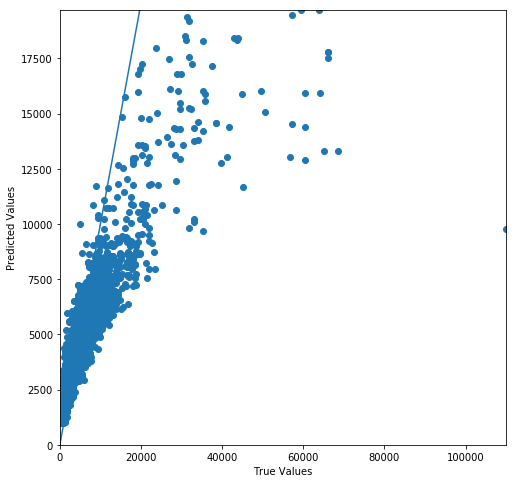

CatBoost Regressor Calibration Curve


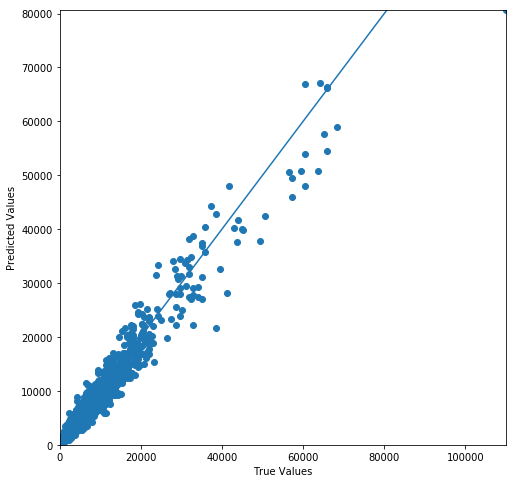

In [72]:
print('Random Forest Regressor Calibration Curve')
da.Calibration(y_train,y_preds_train_rf)
print('CatBoost Regressor Calibration Curve')
da.Calibration(y_train,y_preds_train_cb)

In this plot is shown how calibrated are the models with the training subsample; the straight line represents a perfect calibration!

The CatBoost Regressor model shows the best calibration!

The Random Forest Regressor model has some problems predicting the prices of expensive cars; indeed, it predicts prices lower than the real ones, which is not at all good for the business model!

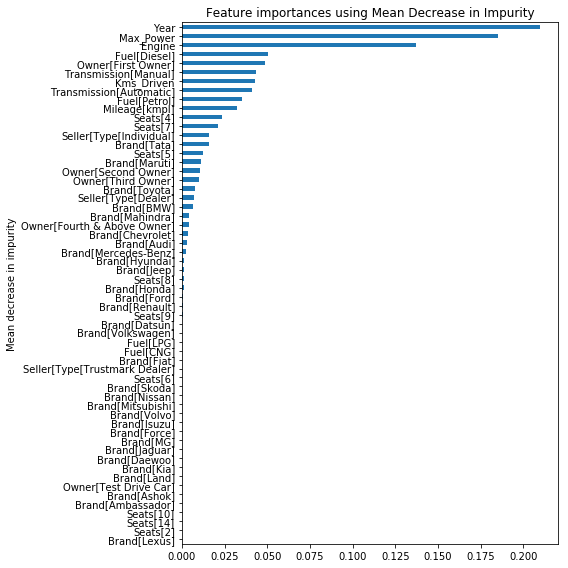

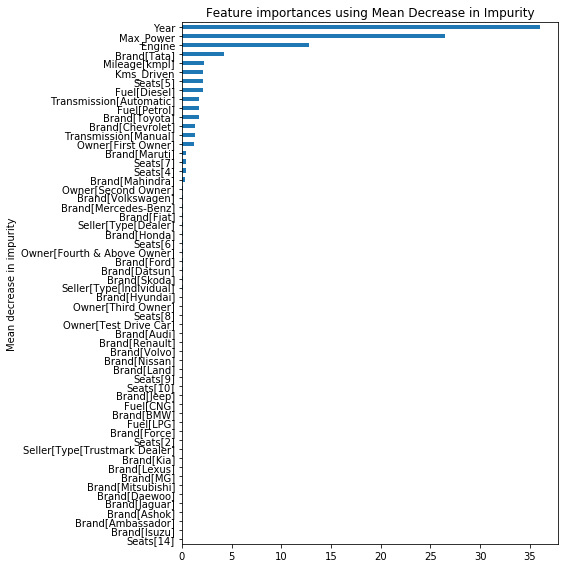

In [73]:
da.Feature_Importances(rf_model,X_train.columns)
da.Feature_Importances(cb_model,X_train.columns)

In the above plot are shown the Mean Impurity feature importances, which helps to understand which features contribute the best!

Both model agree that the top predictive features are: the number of years passed from the construction to present date, the Max Power of the cars and the Engines size (in cubic centimeters). Each model establish other importances for other features!

In [74]:
X_tests, y_tests = testings.drop(config.TARGET,axis=1), testings[config.TARGET]

y_preds_tests_rf = rf_model.predict(X_tests)
y_preds_tests_rf = 10.0**y_preds_tests_rf
rsqd = round(r2_score(y_tests, y_preds_tests_rf),3)
print('The R²-score of the Random Forest Regressor is of {} on the testing subsample.'.format(rsqd))
rmse = round(np.sqrt(mean_squared_error(y_tests, y_preds_tests_rf)),3)
print('The RMSE of the Random Forest Regressor is of {} on the testing subsample.'.format(rmse))

print(' ')

y_preds_tests_cb = cb_model.predict(X_tests)
y_preds_tests_cb = 10.0**y_preds_tests_cb
rsqd = round(r2_score(y_tests, y_preds_tests_cb),3)
print('The R²-score of the CatBoost Regressor is of {} on the testing subsample.'.format(rsqd))
rmse = round(np.sqrt(mean_squared_error(y_tests, y_preds_tests_cb)),3)
print('The RMSE of the CatBoost Regressor is of {} on the testing subsample.'.format(rmse))

The R²-score of the Random Forest Regressor is of 0.233 on the testing subsample.
The RMSE of the Random Forest Regressor is of 4936.586 on the testing subsample.
 
The R²-score of the CatBoost Regressor is of 0.895 on the testing subsample.
The RMSE of the CatBoost Regressor is of 1830.667 on the testing subsample.


Now it is time to score the model based on unseen data, such as the testing subsample!

The R² score of the CatBoost Regressor model, on the testing subsample, is the best, as well the RMSE; when compared to the training subsample, the CatBoost Regressor shows more coherence between the R² scores!

The Random Forest Regressor model, in addition to perform poorly, is overfitted, as the R² scores of the training and testing subsamples are different.

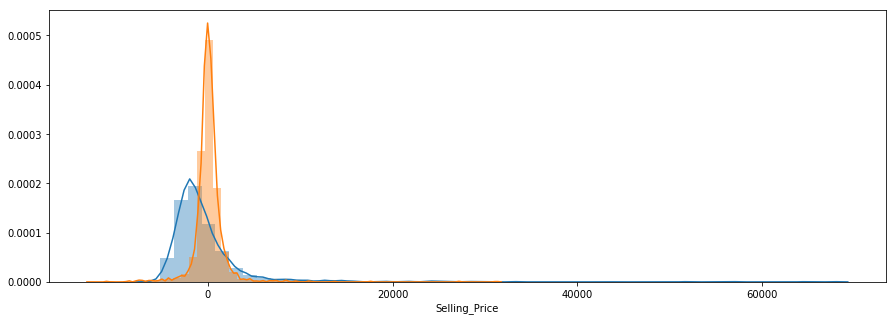

In [75]:
plt.rcParams['figure.figsize'] = (15.0,5.0)  
sns.distplot(y_tests-y_preds_tests_rf)
sns.distplot(y_tests-y_preds_tests_cb)
plt.show()

The distribution of the predition errors on the testing subsample look similar to a Normal Distribution, which is good as well, but to be sure, I will run again a Normality Hypothesis Test!

In [76]:
from scipy.stats import skew, kurtosis

res_tests_rf = y_tests-y_preds_tests_rf
res_tests_cb = y_tests-y_preds_tests_cb

da.Normality_Check(res_tests_rf,0.01)
print(' ')
da.Normality_Check(res_tests_cb,0.01)

print(' ')
print('Random Forest Regressor')
print('Skewness of the residuals (for a normal distribution should be 0): {}'.format(skew(res_tests_rf)))
print(' ')
print('Excess in kurtosis of the residuals (for a normal distribution should be 0): {}'.format(kurtosis(res_tests_rf)))
print(' ')
print('CatBoost Regressor')
print('Skewness of the residuals (for a normal distribution should be 0): {}'.format(skew(res_tests_cb)))
print(' ')
print('Excess in kurtosis of the residuals (for a normal distribution should be 0): {}'.format(kurtosis(res_tests_cb)))

Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Normal Test: The null hypothesis can be rejected
Kolmogorov Test: The null hypothesis can be rejected
 
Random Forest Regressor
Skewness of the residuals (for a normal distribution should be 0): 6.452722562403069
 
Excess in kurtosis of the residuals (for a normal distribution should be 0): 64.06897406024764
 
CatBoost Regressor
Skewness of the residuals (for a normal distribution should be 0): 4.690035225369115
 
Excess in kurtosis of the residuals (for a normal distribution should be 0): 76.88029951743637


I see that yet the prediction errors are not normally distributed, which is quite frequent due to poor quality of the data !

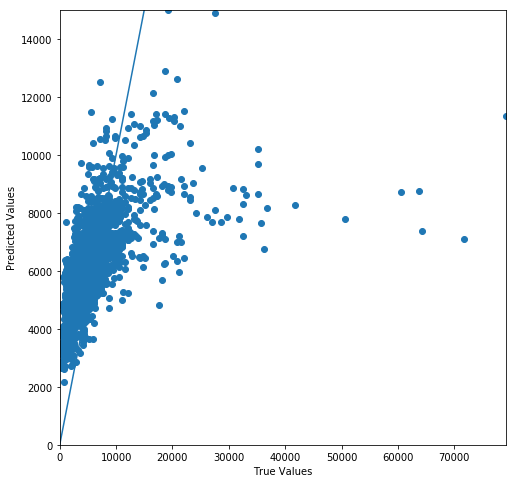

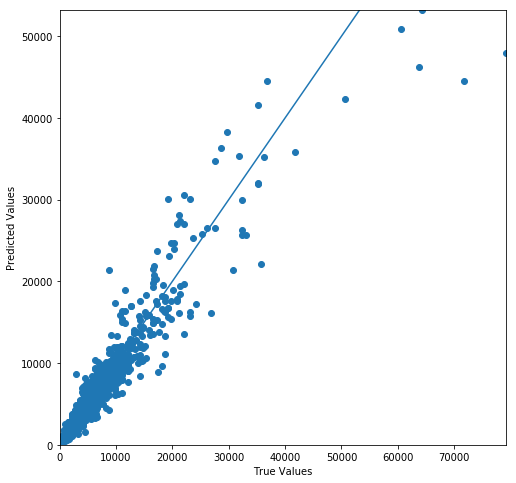

In [77]:
da.Calibration(y_tests,y_preds_tests_rf)
da.Calibration(y_tests,y_preds_tests_cb)

In this plot is shown how calibrated are the regression models with the testing subsample; the straight line represents a perfect calibration!

In the training and testing subsamples, the Random Forest Regressor model shows a very bad performance, with large scatters and therefore, large variance!

Till this point everything is perfect: the best performance is obtained by the CatBoost Regressor model; now I will move to deploy it into the production environment!